# Estudo dos dados da base de dados servicosxis.db

Carlos Ramires

inicio: 23/11/2023
termino: 

Busca das distribuições Tecnicos para uma simulação de capacity

Tabelas importantes da servicosxos.db

servicos: Base raw \
serv_campo: base só com os serviços de campo \
qtd_servicos_'unidade': apresenta a distribuição dos serviços por mês de 2020-01 a 2023-07 \
qtd_tec_mes: Mostra a quantidade de técnicos por unidade por mês\
resumo_servicos: Mostra a quantidade por serviços, por unidade, no periodo\
servicos_mensal: Serviços de campo com Ano_Mes\
servicos_mes: Tem o total de serviços por mes, por unidade\
servicos_tec_mes: Relaciona o número de serviços, por serviço, por técnico, por mes\

# Revisão das Distribuições de Saída


### Criação da tabela base-mensal

### Criação da tabela equipes_mensal




### Assumption

#### Tempo médio de atendimento de um pedido

Considerando o tempo entre abertura e encerramento do chamado tem-se o tempo total do atendimento.

Em 

servicos_mes > Total de serviços/mes

serv_campo > serviços, causa, designado, duração

Dados espúrios serão descartados da seguinte maneira:




#### Tempo médio de execução de um serviço

Um mês tem 176 horas sendo 22 horas de instrução o que define 154 horas úteis

Considerando um fator de ponderação fp, 154 horas trabalhadas no mês e o número de serviços entregues, temos:

num_instal * fp + num_vt * fp + num_ret * fp + num_mud * fp = 154

Portanto, o fp de cada técico será:

fp =   154 / (num_instal + num_vt + num_ret + num_mud)

ou seja, o tempo médio dispendido para cada serviço deverá ser tm = num_serv * fp

### Número de Equipes disponíveis por mês

Em [serv_campo] identificar equipes válidas por unidade e contar equipes ativas mês a mês




In [14]:
import sqlite3
import pandas as pd

# Carrega a tabela servicos da base servicosxis.db para um dataframe

# Cria a conexão
cnx = sqlite3.connect('servicosxis.db')

# carrega tabela servicos em df
df = pd.read_sql_query("SELECT * FROM serv_total_mensal", cnx)

cnx.close()


In [13]:
#Criar Tabela na base com os dados de Tecnicos

# 
# conectar a base

cnx = sqlite3.connect('servicosxis.db')

#Criando a tabela da unidade

tabela = ('equipes_mensal')

df.to_sql(tabela, cnx, if_exists='replace', index=True)

cnx.close()

In [8]:
# lê arquivo base_mensal

import sqlite3
import pandas as pd

df = pd.read_excel('base_mensal.xlsx')

In [29]:
# Limpar a base dos registros > que 2022-02
df=df.query("Ano_Mes <= '2022-02'")
    


In [87]:
# encontrar a média de serviços por mês no período de vida
# e colocar numa lista
from statistics import median, mode, mean, median_grouped, variance, stdev

tecnicos = ['henrique.costa', 
            'diego.morais', 
            'erivaldo.silva', 
            'ricardo.neres', 
            'lucas.coimbra',
            'lander.lucas', 
            'italo.aires', 
            'alessandro.almeida', 
            'cleiton.oliveira', 
            'douglas.santos',
            'edvaldo.oliveira',
            'henrique.soares', 
            'marcelo.martins', 
            'hainer.sohn', 
            'leno.pereira',
            'leonardo.marques',  
           'valdinei.cavalcante'
          ]




for tecnico in tecnicos:
    lista =[]
    l = df[tecnico].tolist()
    for valor in l:
        if valor > 88:
            lista.append(valor)    
    media = round(mean(lista))
    desvio = round(stdev(lista))
    mediana = round(median(lista))
    magrup = round(median_grouped(lista))
    moda = round(mode(lista))
    print(tecnico)
    print(lista)
    print('           ', 'Média   = ', media)
    print('           ', 'Desvio  = ', desvio)
    print('           ', 'Mediana = ', mediana)
    print('           ', 'Group   = ', magrup)
    print('           ', 'Moda    = ', moda)



henrique.costa
[107.0, 135.0, 125.0, 150.0, 133.0, 120.0, 128.0, 141.0, 135.0, 152.0, 156.0, 164.0, 202.0, 188.0, 171.0, 158.0, 153.0]
            Média   =  148
            Desvio  =  24
            Mediana =  150
            Group   =  150
            Moda    =  135
diego.morais
[151.0, 165.0, 203.0, 185.0, 183.0, 165.0, 153.0, 129.0, 100.0, 101.0]
            Média   =  154
            Desvio  =  35
            Mediana =  159
            Group   =  164
            Moda    =  165
erivaldo.silva
[107.0, 108.0, 102.0, 115.0, 106.0, 124.0, 105.0, 124.0, 93.0, 133.0, 199.0, 174.0, 181.0, 127.0, 124.0, 101.0]
            Média   =  126
            Desvio  =  31
            Mediana =  120
            Group   =  124
            Moda    =  124
ricardo.neres
[94.0, 124.0, 121.0, 108.0, 112.0, 113.0, 108.0, 105.0, 105.0, 110.0, 109.0, 107.0]
            Média   =  110
            Desvio  =  8
            Mediana =  108
            Group   =  108
            Moda    =  108
lucas.coimbra
[104.0,

In [86]:
# criar lista de serviços de entrada por unidade
tecnicos = ['henrique.costa', 
            'diego.morais', 
            'erivaldo.silva', 
            'ricardo.neres', 
            'lucas.coimbra',
            'lander.lucas', 
            'italo.aires', 
            'alessandro.almeida', 
            'cleiton.oliveira', 
            'douglas.santos',
            'edvaldo.oliveira',
            'henrique.soares', 
            'marcelo.martins', 
            'hainer.sohn', 
            'leno.pereira',
            'leonardo.marques',  
           'valdinei.cavalcante'
          ]

lista =[]
l = df['diego.morais'].tolist()
for valor in l:
    if valor > 88:
        lista.append(valor)

print(lista)




[151.0, 165.0, 203.0, 185.0, 183.0, 165.0, 153.0, 129.0, 100.0, 101.0]


Melhor Distribuição: gamma
Melhores Parâmetros: (2.743674862572207, 93.58687973280135, 9.541156441834516)


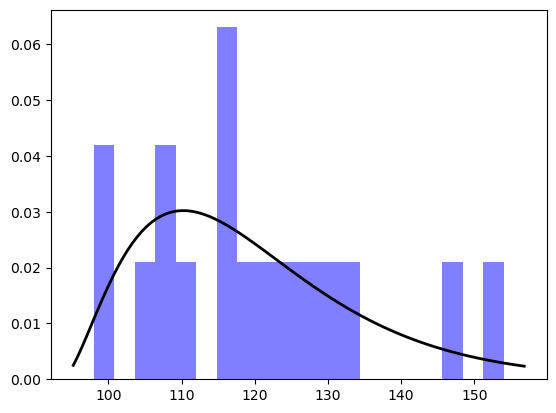

In [88]:
""" encontrar uma distribuição estatística que melhor represente uma lista 
de valores usando Python. Uma abordagem comum para fazer isso é ajustar os dados a 
diferentes distribuições de probabilidade e escolher a distribuição que melhor se ajusta
aos seus dados com base em critérios como o coeficiente de determinação (R²), o teste de 
aderência de Kolmogorov-Smirnov ou o critério de informação Akaike (AIC).

Aqui está um exemplo de como fazer isso usando a biblioteca scipy.stats:
"""
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Suponha que você tenha uma lista de valores 'data'
#data = [10.2, 11.5, 12.8, 9.7, 11.2, 14.1, 8.5, 10.3, 13.0, 12.1]

data = [154, 148, 134, 129, 126, 125, 123, 120, 116, 116, 115, 110, 109, 107, 106, 100, 98]
#data = lista

# Ajustar os dados a diferentes distribuições
distributions = [stats.norm, stats.expon, stats.gamma, stats.lognorm]

best_fit = None
best_params = None
best_sse = float('inf')

for distribution in distributions:
    params = distribution.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    pdf = distribution.pdf(data, loc=loc, scale=scale, *arg)
    sse = np.sum((pdf - data)**2)
    
    if sse < best_sse:
        best_fit = distribution
        best_params = params
        best_sse = sse

# Agora você tem a melhor distribuição encontrada e seus parâmetros
print("Melhor Distribuição:", best_fit.name)
print("Melhores Parâmetros:", best_params)

# Você pode plotar o histograma dos dados e a PDF da melhor distribuição
plt.hist(data, bins=20, density=True, alpha=0.5, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = best_fit.pdf(x, *best_params)
plt.plot(x, p, 'k', linewidth=2)
plt.show()


In [5]:
# Monta um Gráfico 


from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

#df = df_tec_alg

app = Dash(__name__)
 # Monta o dropdown com a coluna country
app.layout = html.Div([
    html.H1(children='Serviços Totais', style={'textAlign':'center'}),
    dcc.Dropdown(df.Unidade.unique(), 'none', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
# Define os eixos x e y
def update_graph(value):
    dff = df[df.Unidade==value]
    return px.bar(dff, x='Ano_Mes', y='Total')

if __name__ == '__main__':
    app.run(debug=True, port=8080)

In [25]:
#Criar Tabela na base com os dados 

# 
# conectar a base

cnx = sqlite3.connect('servicosxis.db')

#Criando a tabela da unidade

tabela = ('serv_campo_ok')

df_ok.to_sql(tabela, cnx, if_exists='replace', index=True)

cnx.close()


In [77]:
# Método para identificar os valores espúrios de uma série 
#    considerando fora algo +/- 2 x desvio_padrão

import numpy as np

# Suponha que 'dados' seja a sua série de dados
dados = [10, 15, 20, 25, 100, 30, 35, 40, 45]

media = np.mean(dados)
desvio_padrao = np.std(dados)

limite_superior = media + 2 * desvio_padrao
limite_inferior = media - 2 * desvio_padrao

outliers = [x for x in dados if x > limite_superior or x < limite_inferior]

print("Outliers:", outliers)


Outliers: [100]


In [78]:
# método de encontrar os dados espúrios a partir do desvio percentual (25% - 75%)

import numpy as np

# Suponha que 'dados' seja a sua série de dados
dados = [10, 15, 20, 25, 100, 30, 35, 40, 45]

q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)

iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = [x for x in dados if x > limite_superior or x < limite_inferior]

print("Outliers:", outliers)


Outliers: [100]


In [ ]:
# Criar uma lista com os dados de entrada para cada serviço de cada unidade para 
# encontrar a melhor distribuição que a representa





In [ ]:
# Criar uma tabela com os dados de performance de cada técnico
# relacionando o número de serviços executados por mês com o número de horas trabalhadas
# considerar: 
# 